In [4]:
import numpy as np
import random
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist
iris = tf.keras.datasets.

In [6]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [7]:
import matplotlib.pylab as plt

In [8]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data() #데이터를 불러 와서 넣음

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
X_train0 #이미지 데이터 -> 2차원 배열로 만들어놓고 -> 다시 1차원 배열로 만들어 인식시킨다.


#이미지는 원래 2차원 배열로 구성되어 있다.
#근데, 학습시킬때는 이 2차원 배열을 전부 1차원으로 만들어서 원핫인코딩(0,1)로서 만듦
#1은 색상이 있는 것인데, 이걸로 색상의 타입을 구분한다.
#

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
y_train0 #그래서~~~ 마지막줄은 8, 마지막줄 전은 6으로 표현해주고 있음

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

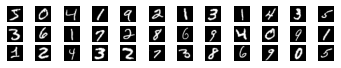

In [17]:
plt.figure(figsize=(6,1))
for i in range(36):
   plt.subplot(3,12, i+1)
   plt.imshow(X_train0[i], cmap='gray') #colormap = gray
   plt.axis('off')
plt.show()

#트레인 데이터 안에 들어가 있는 애들임

In [18]:
#2차원 데이터를 1차원으로 만들어 넣어주는 함수가 있음 / 이미지는 2차원되어 있는걸 1차원으로 읽겠금 해서 컴퓨터가 읽음

In [85]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌
#28x28 짜리 = 784로 만듦

In [22]:
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌

In [23]:
y_train0[:5]  

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
#범주형으로 되어있는건 크고 작다고 생각함. 
#하여 -> 원핫인코딩으로 바꿔줘서 넣어야 데이터를 파단함

In [26]:
#범주형은 one-hot 인코딩으로 각 카테고리별 항목을 만들어, 해당하는 항목에 표시하는 형식으로 0,1로 구분하여줌.
#1은 해당항목에 속한다는 뜻이고, 
#0은 해당항목에 속하지 않는다는 뜻이다.
#원핫인코딩 : keras(to_categorical()) 

In [28]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[0:5] #원핫인코딩임

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
#원핫인코딩 = to_categorical / 데이터를 1차원으로 쭉 만들어줘야하고, 카테고리는 더미파일로 만들어줘야함(원핫인코딩)

In [38]:
from tensorflow.keras.models import Sequential
#DeepLearning의 레이어를 쌓을 수 있는 틀 역할

In [39]:
from tensorflow.keras.layers import Dense
#각 레이어에 해당하는 객체

In [42]:
#옵티마이저 필요 : 학습률 조절
from tensorflow.keras.optimizers import SGD #경사하강법 종류 하나 임포트

In [43]:
tf.random.set_seed(0)

In [45]:
#신경망 구축 시작
#1. 특열할 객체를 생성해라
#2. layer를 쌓아라
#3. model compile // 모델컴파일

model = Sequential() 

In [49]:
#입력층

model.add(Dense(15, input_dim=784, activation='sigmoid')) #Chain식으로 구축함, input은 퍼셉트론인데 현재 글자를 2차원 -> 1차원 배열로 바꿔놓음, 그게 784개임
#이미지는 시그모이드 함수를 이용

In [48]:
#SIGMOID 함수는 0과 1 로 나누어진 것중, 가까운곳에 위치한걸 정답으로 예측함
#로지스틱(시그모이드) -> 어떤 값이 들어왔을때 0.5 이상이면 1로 판단 / 0.5 이하면 0으로 판단해서 -> 결과값을 예측함
#부가 : 계단함수는 0과 1로만 딱 나누어짐 / 

In [52]:
#출력층

model.add(Dense(10, activation='sigmoid'))

In [61]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy']) #SGD 방식을 이용하여, 최적화 기울기를 찾아라. 
#loss 움직일때, 면적으로 움직여라. 움직이는 면적을 점점 줄여라
#1번 그래프, 2번 그래프간의 간격 거리를 줄이며 최적화 시킬때는 mean_square(네모')로 점점 줄이면서 최적화 기울기를 찾으시오.
#accuracy가 점점 떨어진다면, 나는 문제있다고 보여주어라

In [62]:
%%time
hist = model.fit(X_train, Y_train,
                epochs=20, batch_size=100,
                 validation_data=(X_test, Y_test), 
                 verbose=2
                )
#양이 많으니깐, batch로 100개씩 묶어서 해라

Epoch 1/20
600/600 - 1s - loss: 0.1054 - accuracy: 0.1096 - val_loss: 0.0902 - val_accuracy: 0.1135
Epoch 2/20
600/600 - 1s - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0899 - val_accuracy: 0.1135
Epoch 3/20
600/600 - 1s - loss: 0.0899 - accuracy: 0.1124 - val_loss: 0.0898 - val_accuracy: 0.1135
Epoch 4/20
600/600 - 1s - loss: 0.0898 - accuracy: 0.1124 - val_loss: 0.0898 - val_accuracy: 0.1135
Epoch 5/20
600/600 - 1s - loss: 0.0897 - accuracy: 0.1126 - val_loss: 0.0897 - val_accuracy: 0.1141
Epoch 6/20
600/600 - 1s - loss: 0.0897 - accuracy: 0.1146 - val_loss: 0.0896 - val_accuracy: 0.1270
Epoch 7/20
600/600 - 1s - loss: 0.0896 - accuracy: 0.1379 - val_loss: 0.0895 - val_accuracy: 0.1487
Epoch 8/20
600/600 - 1s - loss: 0.0895 - accuracy: 0.1593 - val_loss: 0.0894 - val_accuracy: 0.1797
Epoch 9/20
600/600 - 1s - loss: 0.0894 - accuracy: 0.1922 - val_loss: 0.0893 - val_accuracy: 0.1883
Epoch 10/20
600/600 - 1s - loss: 0.0892 - accuracy: 0.1953 - val_loss: 0.0891 - val_accuracy: 0.2149

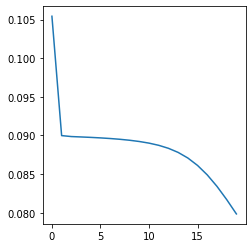

In [63]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.show()

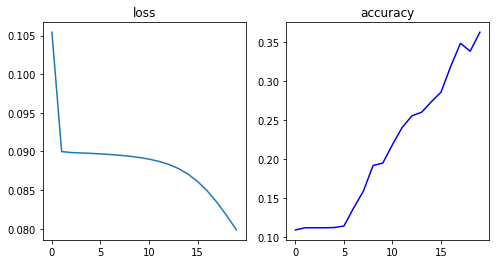

In [64]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], '-b', label='training')
plt.title('accuracy')
plt.show()

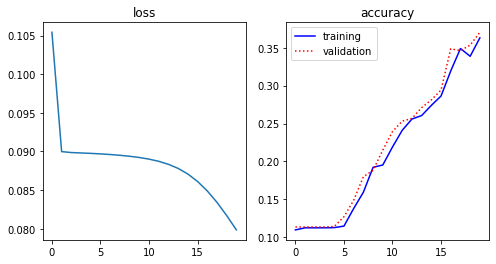

In [68]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], '-b', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

#그래프가 점점 최적화로 되면서, 손실율을 줄이는거다(마진이 줄어드니깐 그래프가 최적화된 선을 찾아가잖아)
#accuracy는 정답률을 점점 맞추고 있다.

In [67]:
hist.history

{'accuracy': [0.1096000000834465,
  0.11236666887998581,
  0.11236666887998581,
  0.11236666887998581,
  0.11263333261013031,
  0.11463333666324615,
  0.13785000145435333,
  0.15931667387485504,
  0.19220000505447388,
  0.195250004529953,
  0.21903333067893982,
  0.2409999966621399,
  0.255866676568985,
  0.26046666502952576,
  0.27390000224113464,
  0.2862499952316284,
  0.3193666636943817,
  0.3489166796207428,
  0.3386833369731903,
  0.36301666498184204],
 'loss': [0.10542640835046768,
  0.08997507393360138,
  0.08985242247581482,
  0.08980055153369904,
  0.08974495530128479,
  0.08967898041009903,
  0.08959849923849106,
  0.0894991084933281,
  0.08937360346317291,
  0.08921270817518234,
  0.08900165557861328,
  0.08871819078922272,
  0.08833137899637222,
  0.08780021965503693,
  0.0870755985379219,
  0.08611304312944412,
  0.08488870412111282,
  0.08340507000684738,
  0.08169688284397125,
  0.0798380970954895],
 'val_accuracy': [0.11349999904632568,
  0.11349999904632568,
  0.11349

In [73]:
#모델을 사용하여예측해봄

model.predict(X_test[:1, :])

#0번부터 9번까지 될 확률을 뽑아준것임
#이미지가 0~9번까지 지금 분류되어있잖아. 

array([[0.07264018, 0.24423516, 0.12725508, 0.06172097, 0.10200086,
        0.08106476, 0.0798209 , 0.49800423, 0.09936762, 0.19656686]],
      dtype=float32)

In [72]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

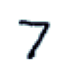

In [77]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=plt.cm.bone_r) #이 행에 끼겠다
plt.grid(False)
plt.axis("off")
plt.show()

In [83]:
model.predict(X_test[1:2, :])

#0~9 까지 각각의 가능성 퍼센티지를 찾아주는 것임

array([[0.15367025, 0.18430829, 0.12829015, 0.15801612, 0.1054309 ,
        0.10327148, 0.19142577, 0.05021504, 0.1070656 , 0.08060401]],
      dtype=float32)

In [84]:
model.predict_classes(X_test[1:2, :], verbose=0)

#Array[6] 에 있는 0.19의 정확도가 제일 높기때문에 -> array[6] 으로 표시한것이고, 그리고 그거의 이미지는 2이다.

array([6])

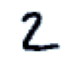

In [82]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[1], cmap=plt.cm.bone_r) #이 행에 끼겠다
plt.grid(False)
plt.axis("off")
plt.show()